In [0]:
import keras

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [0]:
batch_size = 50
num_classes = 10
epochs = 34
num_predictions = 20

In [122]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=3,padding='same'))

In [0]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=3,padding='same'))
model.add(Dropout(0.25))

In [0]:
# model.add(Conv2D(64, (3, 3), padding='valid'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(5, 5),strides=2))
# model.add(Dropout(0.25))

In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [128]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_59 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_60 (Activation)   (None, 10, 10, 64)        0         
__________

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [131]:
history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/34
50000/50000 [==============================] - 15s 297us/step - loss: 1.8845 - acc: 0.3120 - val_loss: 1.6733 - val_acc: 0.4042
Epoch 2/34
50000/50000 [==============================] - 14s 286us/step - loss: 1.5974 - acc: 0.4161 - val_loss: 1.4699 - val_acc: 0.4618
Epoch 3/34
50000/50000 [==============================] - 14s 286us/step - loss: 1.4852 - acc: 0.4620 - val_loss: 1.3786 - val_acc: 0.5053
Epoch 4/34
50000/50000 [==============================] - 14s 286us/step - loss: 1.4015 - acc: 0.4932 - val_loss: 1.3558 - val_acc: 0.5177
Epoch 5/34
50000/50000 [==============================] - 14s 289us/step - loss: 1.3380 - acc: 0.5201 - val_loss: 1.2260 - val_acc: 0.5612
Epoch 6/34
50000/50000 [==============================] - 14s 289us/step - loss: 1.2751 - acc: 0.5451 - val_loss: 1.1797 - val_acc: 0.5802
Epoch 7/34
50000/50000 [==============================] - 14s 285us/step - loss: 1.2278 - acc: 0.5611 - val_loss: 1.

In [133]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 130us/step
Test loss: 0.7536503143310547
Test accuracy: 0.7433


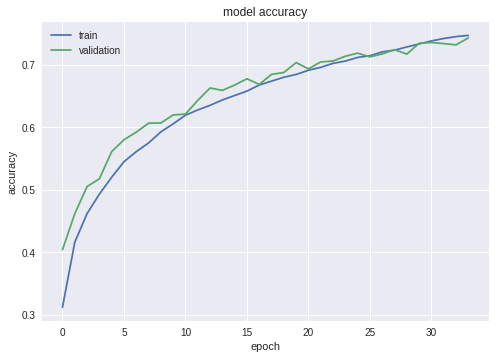

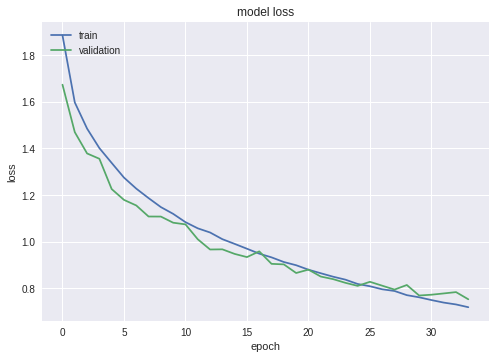

In [134]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()